<img src="http://naonedia.fr/wp-content/uploads/2018/10/logoNaonedia.png" style="height:100px">
<h1>
    <center>Expérience Logement</center>
    <center>-</center>
    <center>Analyse status économique</center>
</h1>


<h3> Introduction </h3>

Analyse du jeu de données fournit par <a href="https://www.insee.fr/fr/statistiques/2830166#graphique-figure1">l'INSEE</a>.
<br>
Ce jeu de données contient l'évolution du revenu disponible brut et du pouvoir d'achat depuis 1949

Le but de ce notebook est de réaliser une première analyse des données afin de pouvoir enrichir notre jeu de données existant. Nous allons donc examiner le dataset afin de répérer 
Pour cela nous allons regarder les différentes features disponibles.

<h3>Informations</h3>

Il est fortement conseillé d'utiliser Python3.x
Si vous ne disposez pas de toutes les librairies requises , il suffit de l'installer en utilisant la commande suivante.
<br>
<code>pip3 install ....</code>

<h3>Authors:</h3>
<cite>Thibault Brocherieux - Ippon Technologies</cite>

## Dataset

  * [Évolution du revenu disponible brut et du pouvoir d’achat]()

## Import package

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [25, 25]

## Quick visualization

In [4]:
data_eco = pd.read_csv('data/finance.csv', delimiter=',', header=0)
data_eco.sort_values(['annee', 'trimestre'], ascending=[True, True], inplace=True)
data_eco.head()

,annee,trimestre,rdb,rdb_uc,pa_rdb,pa_rdb_uc,taux_epargne,taux_epargne_financier
279,1949,T1,nd,nd,nd,nd,16.5,10.1
278,1949,T2,1.9,nd,1.2,nd,16.8,10.2
277,1949,T3,1.9,nd,-1,nd,14.0,7.2
276,1949,T4,2.1,nd,1.6,nd,15.7,8.6
275,1950,T1,2.4,nd,0.9,nd,15.1,7.7


In [5]:
def displayGraph():
    plt.subplot(321)
    plt.xlabel('Année')
    plt.ylabel('évolution en %')
    plt.title('Revenu disponible brut (RDB)')
    plt.plot(data_eco['periode'], data_eco['rdb'])
    plt.xticks(['2000-T1','2002-T1','2004-T1','2006-T1','2008-T1','2010-T1','2012-T1','2014-T1','2016-T1','2018-T1'])


    plt.subplot(322)
    plt.xlabel('Année')
    plt.ylabel('évolution en %')
    plt.title('RDB par unité de consommation')
    plt.plot(data_eco['periode'], data_eco['rdb_uc'])
    plt.xticks(['2000-T1','2002-T1','2004-T1','2006-T1','2008-T1','2010-T1','2012-T1','2014-T1','2016-T1','2018-T1'])


    plt.subplot(323)
    plt.xlabel('Année')
    plt.ylabel('évolution en %')
    plt.title('Pouvoir d\'achat du RDB')
    plt.plot(data_eco['periode'], data_eco['pa_rdb'])
    plt.xticks(['2000-T1','2002-T1','2004-T1','2006-T1','2008-T1','2010-T1','2012-T1','2014-T1','2016-T1','2018-T1'])


    plt.subplot(324)
    plt.xlabel('Année')
    plt.ylabel('évolution en %')
    plt.title('Pouvoir d\'achat du RDB par UC')
    plt.plot(data_eco['periode'], data_eco['pa_rdb_uc'])
    plt.xticks(['2000-T1','2002-T1','2004-T1','2006-T1','2008-T1','2010-T1','2012-T1','2014-T1','2016-T1','2018-T1'])


    plt.subplot(325)
    plt.xlabel('Année')
    plt.ylabel('évolution en %')
    plt.title('Taux épargne')
    plt.plot(data_eco['periode'], data_eco['taux_epargne'])
    plt.xticks(['2000-T1','2002-T1','2004-T1','2006-T1','2008-T1','2010-T1','2012-T1','2014-T1','2016-T1','2018-T1'])


    plt.subplot(326)
    plt.xlabel('Année')
    plt.ylabel('évolution en %')
    plt.title('Taux épargne financière')
    plt.plot(data_eco['periode'], data_eco['taux_epargne_financier'])
    plt.xticks(['2000-T1','2002-T1','2004-T1','2006-T1','2008-T1','2010-T1','2012-T1','2014-T1','2016-T1','2018-T1'])


    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.show()

In [6]:
# Here we combine year and trimester to get X-axis values
data_eco['annee'] = data_eco['annee'].astype(str)
data_eco['periode'] = data_eco[['annee', 'trimestre']].apply(lambda x: '-'.join(x), axis=1)

## Nettoyage

Nos données dvf n'étant disponible qu'à partir de 2014, nous allons prendre l'année 2000 comme la référence de nos données économiques. Prendre les années précédentes n'offriraient pas forcément une meilleure corrélation.

In [7]:
data_eco['annee'] = data_eco['annee'].astype('int64')


data_eco.drop(data_eco[data_eco['annee'] < 2000].index, inplace=True)

data_eco['rdb'] = data_eco['rdb'].astype('float64')
data_eco['rdb_uc'] = data_eco['rdb_uc'].astype('float64')
data_eco['pa_rdb'] = data_eco['pa_rdb'].astype('float64')
data_eco['pa_rdb_uc'] = data_eco['pa_rdb_uc'].astype('float64')
data_eco['taux_epargne'] = data_eco['taux_epargne'].astype('float64')
data_eco['taux_epargne_financier'] = data_eco['taux_epargne_financier'].astype('float64')
data_eco.head()

,annee,trimestre,rdb,rdb_uc,pa_rdb,pa_rdb_uc,taux_epargne,taux_epargne_financier,periode
75,2000,T1,1.4,1.2,0.4,0.2,13.0,4.1,2000-T1
74,2000,T2,1.4,1.2,0.9,0.7,13.0,4.0,2000-T2
73,2000,T3,0.9,0.7,0.2,-0.1,12.7,3.6,2000-T3
72,2000,T4,3.9,3.6,3.1,2.9,15.1,6.0,2000-T4
71,2001,T1,-0.2,-0.4,-0.4,-0.6,14.0,4.7,2001-T1


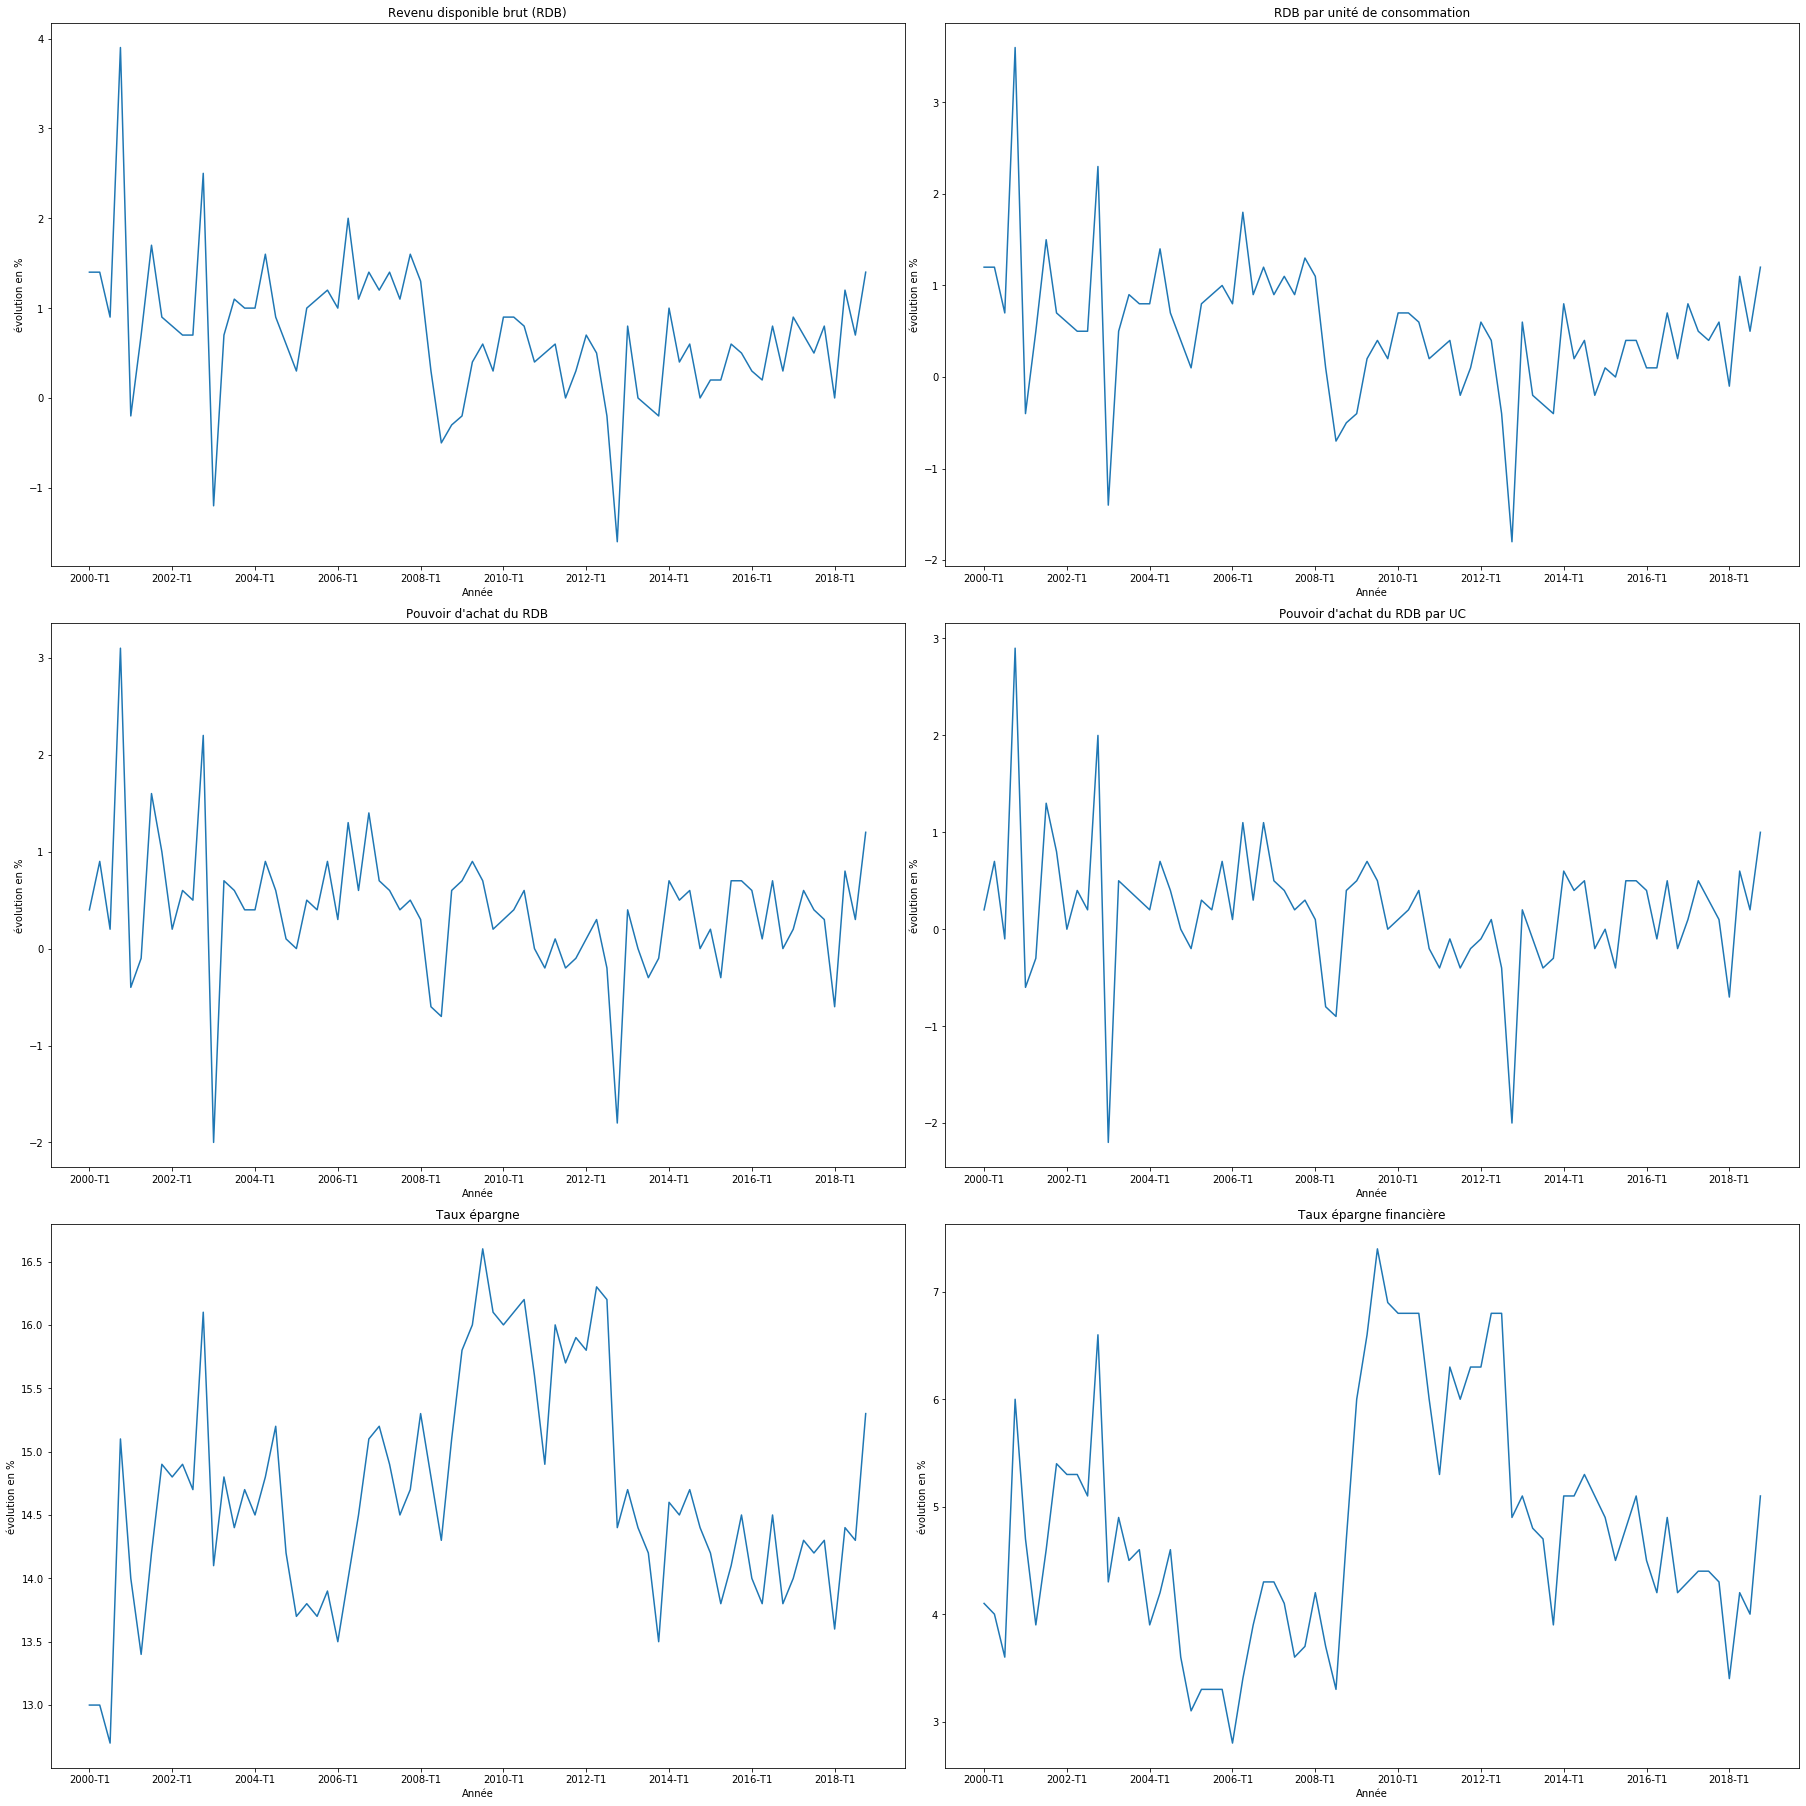

In [8]:
displayGraph()

Il est important de noter que les valeurs des features sont exprimées en pourcentage. De plus la valeur indique 
l'évolution par rapport au semestre précédent. Pour avoir une meilleur vision de l'évolution de ces valeurs, nous allons nous basée sur l'année 2000 comme an 0. À partir de cette date nous allons pouvoir observer l'évolutions des valeurs.

In [9]:
data_eco.loc[(data_eco['annee'] == 2000) & (data_eco['trimestre'] == 'T1'),'rdb'] = 100
data_eco.loc[(data_eco['annee'] == 2000) & (data_eco['trimestre'] == 'T1'),'rdb_uc'] = 100
data_eco.loc[(data_eco['annee'] == 2000) & (data_eco['trimestre'] == 'T1'),'pa_rdb'] = 100
data_eco.loc[(data_eco['annee'] == 2000) & (data_eco['trimestre'] == 'T1'),'pa_rdb_uc'] = 100
data_eco.loc[(data_eco['annee'] == 2000) & (data_eco['trimestre'] == 'T1'),'taux_epargne'] = 100
data_eco.loc[(data_eco['annee'] == 2000) & (data_eco['trimestre'] == 'T1'),'taux_epargne_financier'] = 100

In [10]:
def getNextTrimester(dataframe, index, col_name):
    dataframe.at[index,col_name] = dataframe.at[index + 1,col_name] + dataframe.at[index,col_name] * (dataframe.at[index + 1,col_name] / 100)

In [11]:
for index in data_eco.iloc[1:].index:
    getNextTrimester(data_eco, index, 'rdb')
    getNextTrimester(data_eco, index, 'rdb_uc')
    getNextTrimester(data_eco, index, 'pa_rdb')
    getNextTrimester(data_eco, index, 'pa_rdb_uc')
    getNextTrimester(data_eco, index, 'taux_epargne')
    getNextTrimester(data_eco, index, 'taux_epargne_financier')

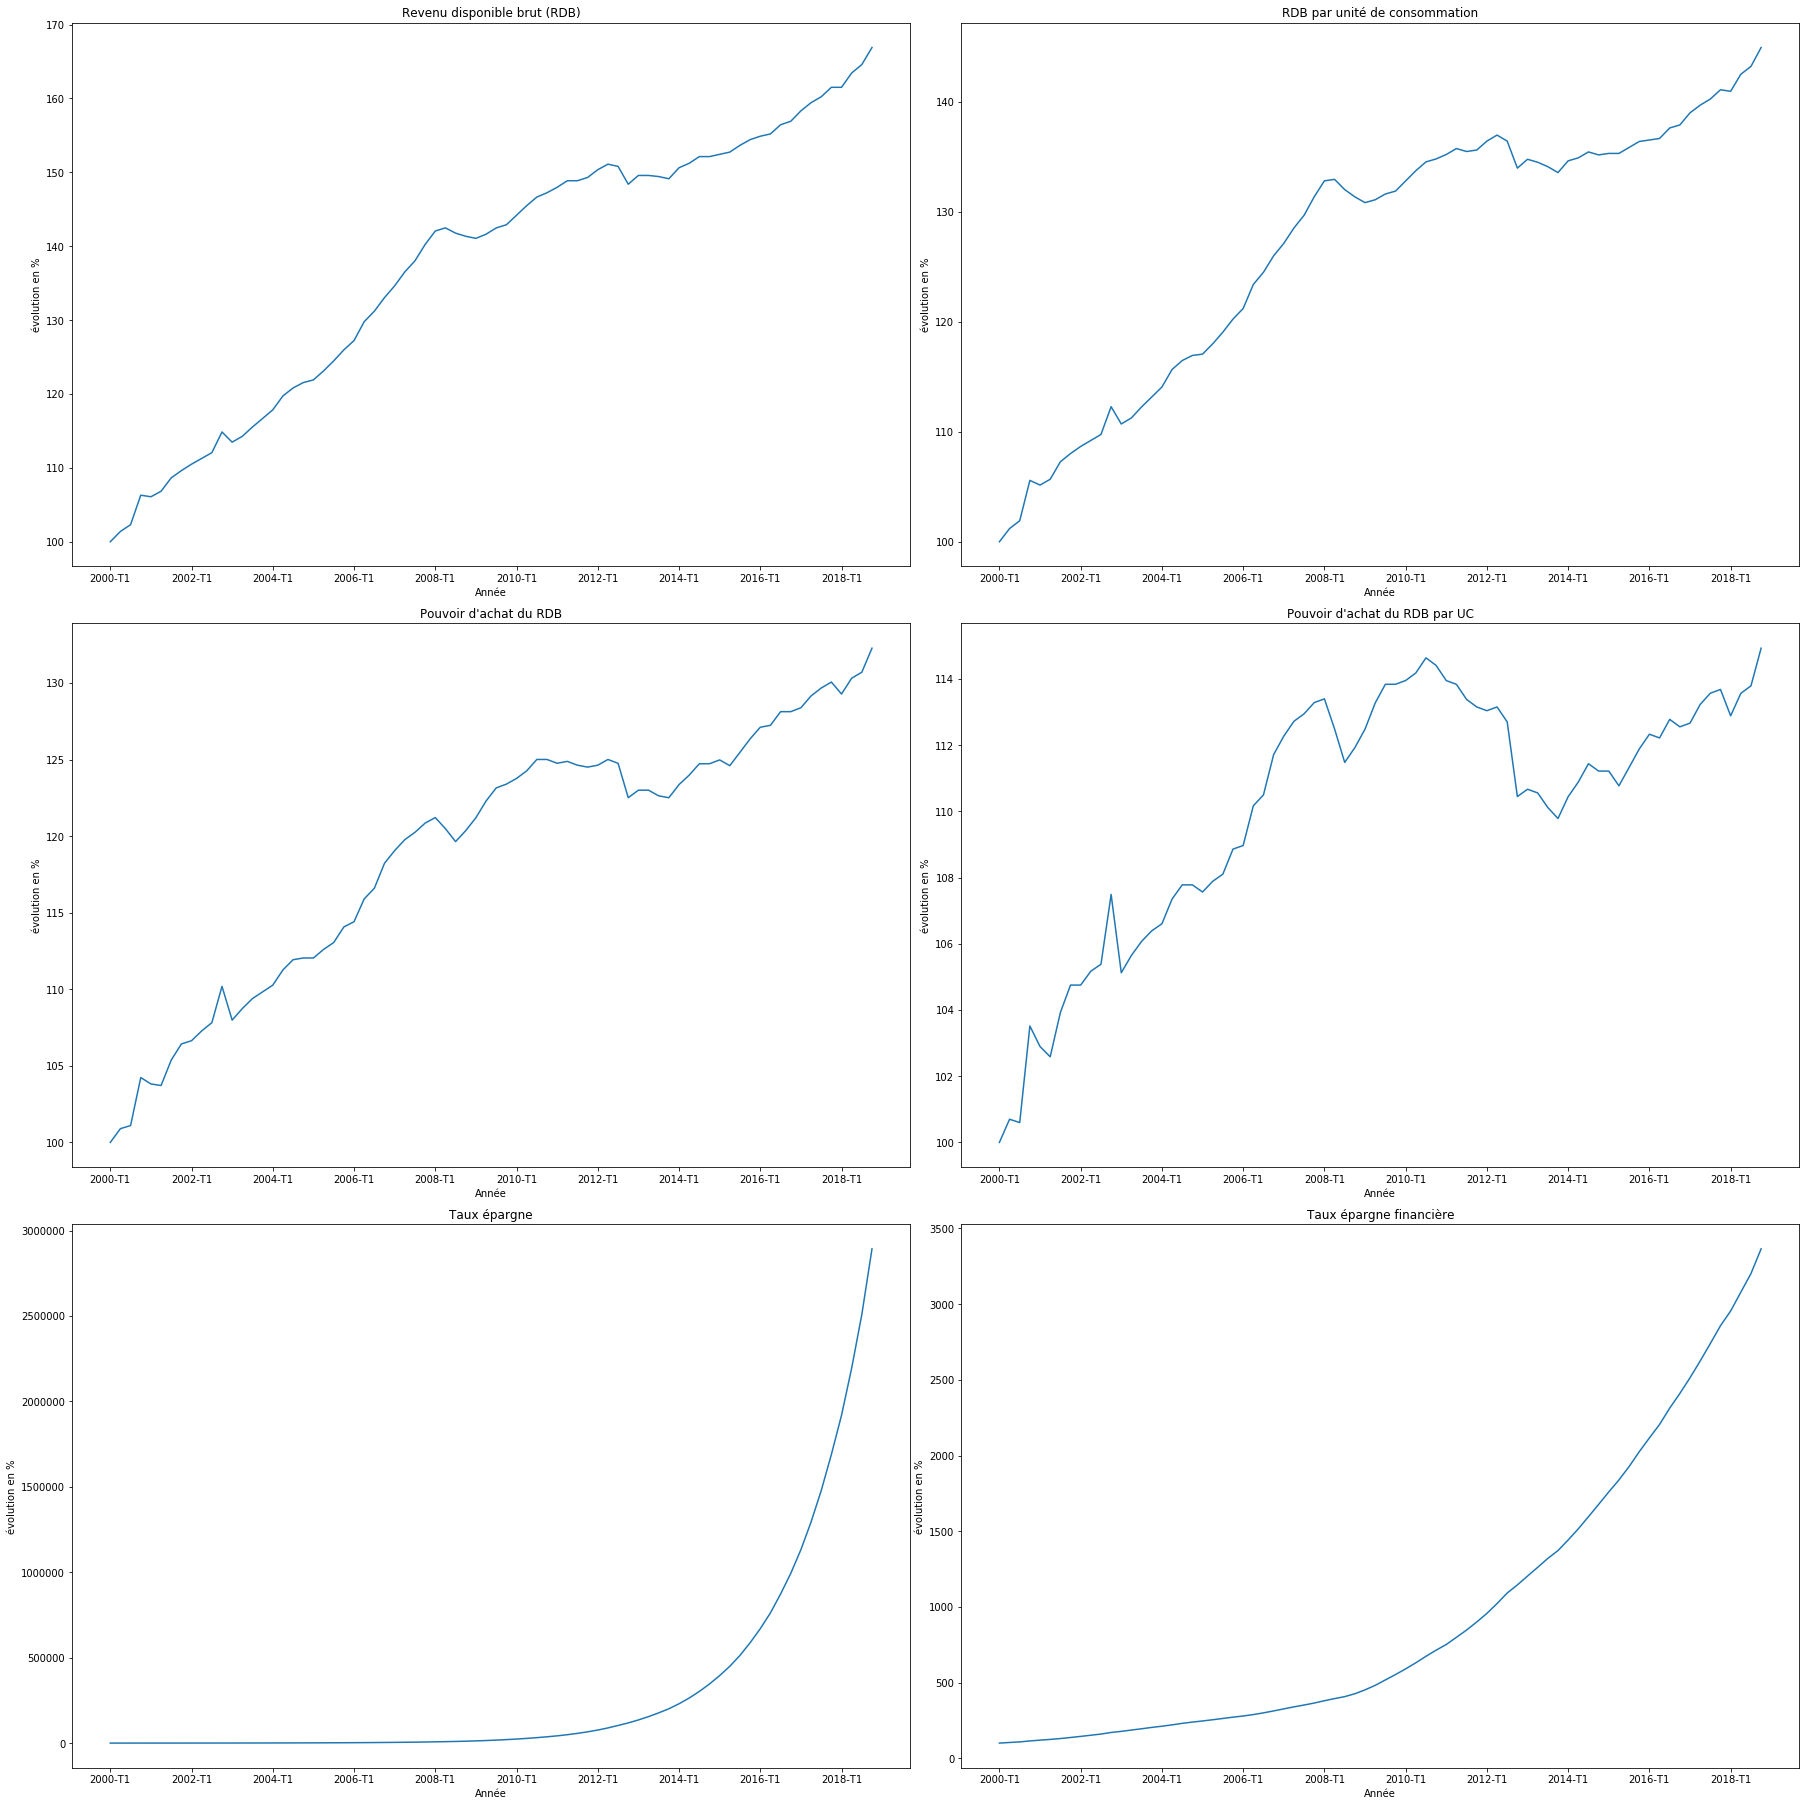

In [12]:
displayGraph()

Ici on peut observer l'évolution de ces valeurs et remarquer la crise de 2008 et 2012.

# Enrichissement du jeu de données
## Chargement du jeu de données à enrichir

In [6]:
#data = pd.read_pickle('data/datasets/dvf_nantes_cleaned.pkl.xz')
#data['date_mutation'] = pd.to_datetime(data['date_mutation'])


data = pd.read_csv('data/datasets/origin_enriched_v2.csv', parse_dates=['date_mutation'])

data.head()

,date_mutation,valeur_fonciere,code_postal,nom_commune,surface_carrez,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,mois,...,car/distractions/zoo,foot/medical/doctors,foot/tan/tram_stop,foot/distractions/arts_centre,foot/distractions/museum,car/distractions/gallery,foot/distractions/gallery,car/tan/station,foot/tan/station,foot/distractions/zoo
0,2016-05-27,240000.0,44800,ST-HERBLAIN,145.00,Maison,145.0,7,352.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-06-09,104450.0,44800,ST-HERBLAIN,54.50,Appartement,54.0,2,54.0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-06-21,230000.0,44100,NANTES,92.00,Maison,92.0,3,192.0,6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-06-03,122000.0,44300,NANTES,58.61,Appartement,59.0,3,59.0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-05-23,159000.0,44000,NANTES,49.58,Appartement,52.0,3,52.0,5,...,0.0,5.0,6.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0


## Extraction des dates

Nous extrayons l'année et le mois pour pouvoir croisées les deux jeux de données. De plus, nous allons enprofiter pour transformer les mois en données cycliques.

In [67]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

data['mois'] = data.date_mutation.dt.month
data['annee'] = data.date_mutation.dt.year
data = encode(data, 'mois', 12)

In [214]:
def monthToTrimester(month):
    if month <= 3:
        return 'T1'
    elif month <= 6:
        return 'T2'
    elif month <= 9:
        return 'T3'
    elif month <= 12:
        return 'T4'

AVAILABLE_TRIMESTER = [str(j) + '-' + i for j in range(2000,2019,1) for i in ['T1', 'T2', 'T3', 'T4']]

def getLastNYears(year, month, n ):
    index = AVAILABLE_TRIMESTER.index(str(year) + '-'+ monthToTrimester(month))
    

    return AVAILABLE_TRIMESTER[index-20: index]


def addEco(data,data_finance):
    YEAR_LOOKBACK = 5
    columnsList = list(data_finance.drop('annee', axis=1))
    
    for i, row in data.iterrows():
        toRetrieve = getLastNYears(row['annee'], row['mois'],YEAR_LOOKBACK)
        k = YEAR_LOOKBACK - 1
        j = 0
        for index, val in enumerate(toRetrieve):
            if j >= 4:
                j %= 4
                k -= 1
            j += 1
            res = data_finance[data_finance['periode']==val].drop(['annee','trimestre','periode'], axis=1)
            for col_name in list(res):
                data.loc[i, str(k) + '-' + str(j) + '-' + col_name] = res[col_name].item()

    return data

In [222]:
addEco(data, data_eco).to_csv('data/finance.csv',index=False)

# Si vous ne disposez pas d'assez de mémoire, vous pouvez diviser le traitement en chunk,
# puis concatener les chunks par la suite.
# addEco(data[0:10000], data_eco).to_csv('data/finance_1.csv',index=False)
# addEco(data[10000:20000], data_eco).to_csv('data/finance_2.csv',index=False)
# addEco(data[20000:30000], data_eco).to_csv('data/finance_3.csv',index=False)
# addEco(data[30000:40000], data_eco).to_csv('data/finance_4.csv',index=False)
# pd.concat([pd.read_csv('data/finance_1.csv'),pd.read_csv('data/finance_2.csv'),pd.read_csv('data/finance_3.csv'),pd.read_csv('data/finance_4.csv')]).to_csv('data/datasets/origin_enriched_v3.csv', index=False)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: `item` has been deprecated and will be removed in a future version
